# 137. 단순 수익 대 로그 수익

In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.DataFrame(index=[2016,2017,2018], data=[100,50,95], columns=["price"])

In [37]:
df

,price
2016,100
2017,50
2018,95


## 단순 수익 평균

In [38]:
simple_returns = df.pct_change().dropna()
simple_returns

,price
2017,-0.5
2018,0.9


In [39]:
simple_returns.mean()

price    0.2
dtype: float64

In [40]:
100 * 1.2 * 1.2

144.0

## 로그 수익 평균

In [41]:
df

,price
2016,100
2017,50
2018,95


In [42]:
df/df.shift(1)

,price
2016,NaN
2017,0.5
2018,1.9


In [43]:
log_returns = np.log(df/df.shift(1)).dropna()
log_returns

,price
2017,-0.693147
2018,0.641854


C:\Users\dukim\AppData\Local\Temp\ipykernel_7136\3303726538.py:4: RuntimeWarning: divide by zero encountered in log
  log_y = np.log(x)


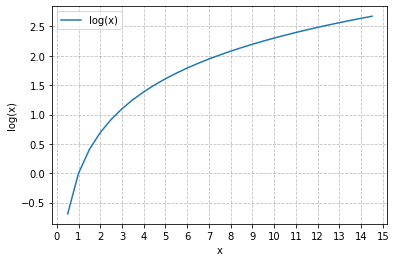

In [44]:
import matplotlib.pyplot as plt

x = np.arange(0, 15, 0.5)
log_y = np.log(x)

plt.xlabel('x')
plt.ylabel('log(x)')
plt.grid(color="gray", alpha=.5, linestyle='--')
plt.xticks(range(17))
plt.plot(x, log_y, label='log(x)')
plt.legend()
plt.show()


In [45]:
log_returns.mean()

price   -0.025647
dtype: float64

In [46]:
100 * np.exp(2 * log_returns.mean())

price    95.0
dtype: float64

## 결론
일반적으로 단순 수익 평균 보단 로그 수익 평균이 더 나음

# 138 엑셀에서 금융 데이터 가져오기

In [47]:
!pip install --upgrade pandas
!pip install --upgrade xlrd
import pandas as pd
import pkg_resources
pkg_resources.get_distribution("xlrd").version

'2.0.1'

In [48]:
pd.read_excel("../data/SP500.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1970-12-31,92.269997,92.790001,91.360001,92.150002,92.150002,13390000
1,1971-01-04,92.150002,92.190002,90.639999,91.150002,91.150002,10010000
2,1971-01-05,91.150002,92.279999,90.690002,91.800003,91.800003,12600000
3,1971-01-06,91.800003,93.000000,91.500000,92.349998,92.349998,16960000
4,1971-01-07,92.349998,93.260002,91.750000,92.379997,92.379997,16460000
...,...,...,...,...,...,...,...
12102,2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,2416.620117,-980924592
12103,2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,-1681037296
12104,2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,-60977296
12105,2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,-198357296


In [49]:
pd.read_excel("../data/SP500.xls", parse_dates=["Date"], index_col="Date")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002,92.150002,13390000
1971-01-04,92.150002,92.190002,90.639999,91.150002,91.150002,10010000
1971-01-05,91.150002,92.279999,90.690002,91.800003,91.800003,12600000
1971-01-06,91.800003,93.000000,91.500000,92.349998,92.349998,16960000
1971-01-07,92.349998,93.260002,91.750000,92.379997,92.379997,16460000
...,...,...,...,...,...,...
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,2416.620117,-980924592
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,-1681037296
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,-60977296


In [50]:
pd.read_excel("../data/SP500.xls", parse_dates=["Date"], index_col="Date", usecols="A:E")

,Open,High,Low,Close
Date,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002
1971-01-04,92.150002,92.190002,90.639999,91.150002
1971-01-05,91.150002,92.279999,90.690002,91.800003
1971-01-06,91.800003,93.000000,91.500000,92.349998
1971-01-07,92.349998,93.260002,91.750000,92.379997
...,...,...,...,...
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951


In [51]:
pd.read_excel("../data/SP500.xls", sheet_name="Sales")

,Unnamed: 0,City,Sales
0,Mike,New York,25
1,Jim,Boston,43
2,Steven,London,76
3,Joe,Madrid,12
4,Tom,Paris,89


In [52]:
SP500 = pd.read_excel("../data/SP500.xls", parse_dates=["Date"], index_col="Date", usecols="A:E")

In [53]:
SP500.head()

,Open,High,Low,Close
Date,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002
1971-01-04,92.150002,92.190002,90.639999,91.150002
1971-01-05,91.150002,92.279999,90.690002,91.800003
1971-01-06,91.800003,93.000000,91.500000,92.349998
1971-01-07,92.349998,93.260002,91.750000,92.379997


In [54]:
SP500.tail()

,Open,High,Low,Close
Date,,,,
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990


In [55]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [56]:
SP500.to_csv("../temp/SP500.csv")

In [58]:
SP500.to_excel("../temp/SP500_red.xlsx")

#139 rolling() 메소드로 단순 이동 평균(SMA) 계산하기

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [60]:
SP500 = pd.read_csv("../temp/SP500.csv", parse_dates=["Date"], index_col="Date")

In [61]:
SP500.head()

,Open,High,Low,Close
Date,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002
1971-01-04,92.150002,92.190002,90.639999,91.150002
1971-01-05,91.150002,92.279999,90.690002,91.800003
1971-01-06,91.800003,93.000000,91.500000,92.349998
1971-01-07,92.349998,93.260002,91.750000,92.379997


In [62]:
SP500.tail()

,Open,High,Low,Close
Date,,,,
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990


In [63]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [64]:
SP500 = SP500.Close.to_frame()

In [65]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


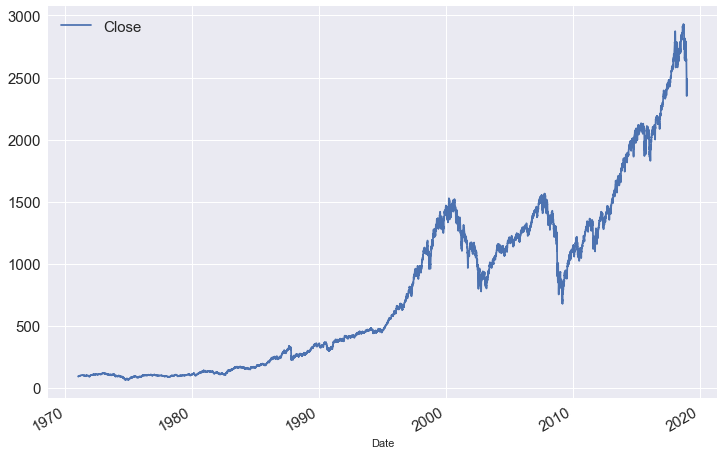

In [66]:
SP500.plot(figsize=(12,8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [67]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [68]:
SP500.rolling(window=10)

Rolling [window=10,center=False,axis=0,method=single]

In [69]:
type(SP500.rolling(window=10))

pandas.core.window.rolling.Rolling

In [70]:
SP500.head(15)

,Close
Date,
2008-12-31,903.250000
2009-01-02,931.799988
2009-01-05,927.450012
2009-01-06,934.700012
2009-01-07,906.650024
2009-01-08,909.729980
2009-01-09,890.349976
2009-01-12,870.260010
2009-01-13,871.789978


In [71]:
SP500.rolling(window = 10).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [72]:
SP500.rolling(window=10, min_periods=5).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,920.770007
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [73]:
diff = pd.DataFrame()
diff['non period'] = SP500.rolling(window = 10).mean().head(10)
diff['period'] = SP500.rolling(window = 10, min_periods=5).mean().head(10)
diff

,non period,period
Date,,
2008-12-31,NaN,NaN
2009-01-02,NaN,NaN
2009-01-05,NaN,NaN
2009-01-06,NaN,NaN
2009-01-07,NaN,920.770007
2009-01-08,NaN,918.930003
2009-01-09,NaN,914.847142
2009-01-12,NaN,909.273750
2009-01-13,NaN,905.108887


#140 SMA로 세우는 모멘텀 트레이딩 전략

In [74]:
SP500.head()

,Close
Date,
2008-12-31,903.250000
2009-01-02,931.799988
2009-01-05,927.450012
2009-01-06,934.700012
2009-01-07,906.650024


In [75]:
SP500.tail()

,Close
Date,
2018-12-21,2416.620117
2018-12-24,2351.100098
2018-12-26,2467.699951
2018-12-27,2488.830078
2018-12-28,2485.739990


In [76]:
SP500["SMA50"] = SP500.rolling(window=50, min_periods=50).mean()

In [77]:
SP500

,Close,SMA50
Date,,
2008-12-31,903.250000,NaN
2009-01-02,931.799988,NaN
2009-01-05,927.450012,NaN
2009-01-06,934.700012,NaN
2009-01-07,906.650024,NaN
...,...,...
2018-12-21,2416.620117,2692.420195
2018-12-24,2351.100098,2684.874795
2018-12-26,2467.699951,2678.886196


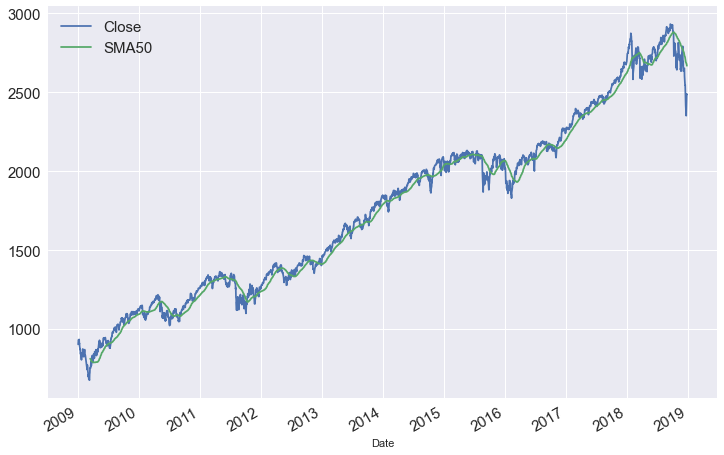

In [78]:
SP500.plot(figsize=(12, 8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

In [79]:
SP500["SMA200"] = SP500.Close.rolling(window=200).mean()

In [80]:
SP500.tail()

,Close,SMA50,SMA200
Date,,,
2018-12-21,2416.620117,2692.420195,2753.65980
2018-12-24,2351.100098,2684.874795,2751.48245
2018-12-26,2467.699951,2678.886196,2749.90585
2018-12-27,2488.830078,2673.646997,2748.52345
2018-12-28,2485.739990,2667.163398,2747.20475


In [81]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2008-12-31 to 2018-12-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   SMA50   2467 non-null   float64
 2   SMA200  2317 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


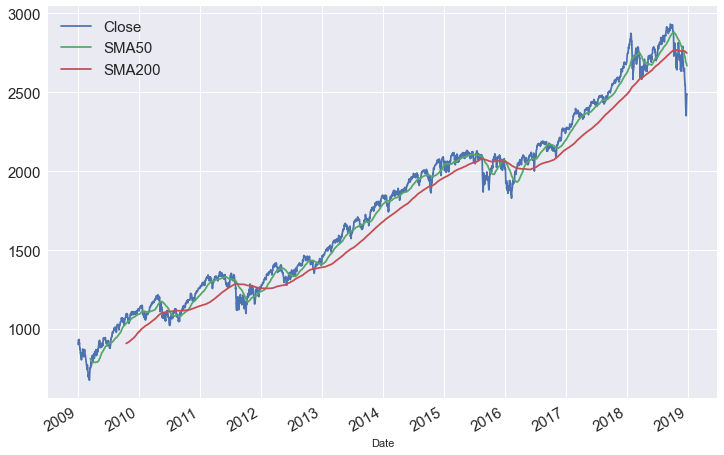

In [82]:
SP500.plot(figsize=(12, 8), fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

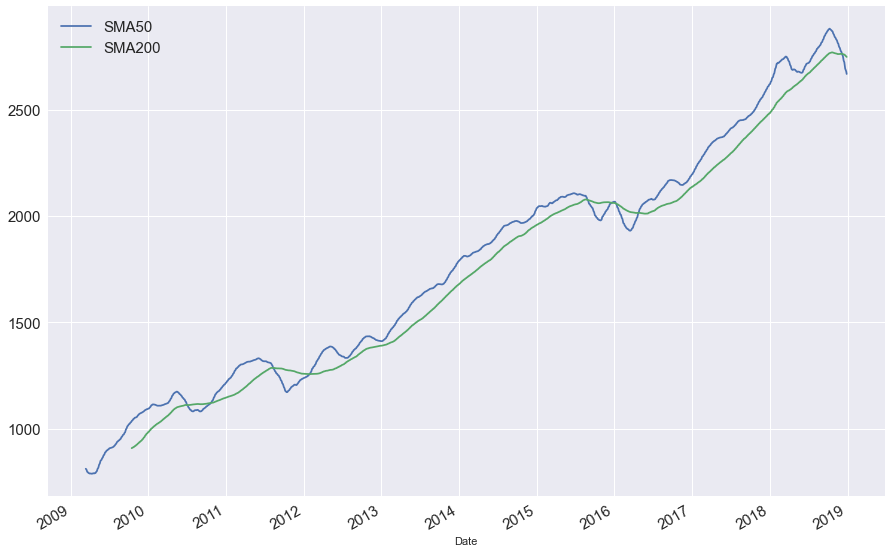

In [83]:
SP500.iloc[:, -2:].plot(figsize=(15,10), fontsize=15)
plt.legend(fontsize=15)
plt.show()

#141 지수 가중 이동 평균(EWMA)

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [86]:
SP500 = pd.read_csv("../temp/SP500.csv", parse_dates=["Date"], index_col="Date", usecols=["Date","Close"])

In [87]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


In [88]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [89]:
SP500.Close.rolling(window=10).mean()

Date
2008-12-31            NaN
2009-01-02            NaN
2009-01-05            NaN
2009-01-06            NaN
2009-01-07            NaN
                 ...     
2018-12-21    2565.915991
2018-12-24    2537.254004
2018-12-26    2520.345996
2018-12-27    2504.121997
2018-12-28    2487.641992
Name: Close, Length: 2516, dtype: float64

In [90]:
SP500.Close.ewm(span=10, min_periods=10).mean()

Date
2008-12-31            NaN
2009-01-02            NaN
2009-01-05            NaN
2009-01-06            NaN
2009-01-07            NaN
                 ...     
2018-12-21    2547.124619
2018-12-24    2511.483797
2018-12-26    2503.523098
2018-12-27    2500.851640
2018-12-28    2498.104067
Name: Close, Length: 2516, dtype: float64

In [91]:
SP500["SMA"] = SP500.Close.rolling(window=100).mean()
SP500["EMA"] = SP500.Close.ewm(span=100, min_periods=100).mean()

In [92]:
SP500

,Close,SMA,EMA
Date,,,
2008-12-31,903.250000,NaN,NaN
2009-01-02,931.799988,NaN,NaN
2009-01-05,927.450012,NaN,NaN
2009-01-06,934.700012,NaN,NaN
2009-01-07,906.650024,NaN,NaN
...,...,...,...
2018-12-21,2416.620117,2785.905496,2732.088580
2018-12-24,2351.100098,2781.282896,2724.544253
2018-12-26,2467.699951,2777.687695,2719.458228


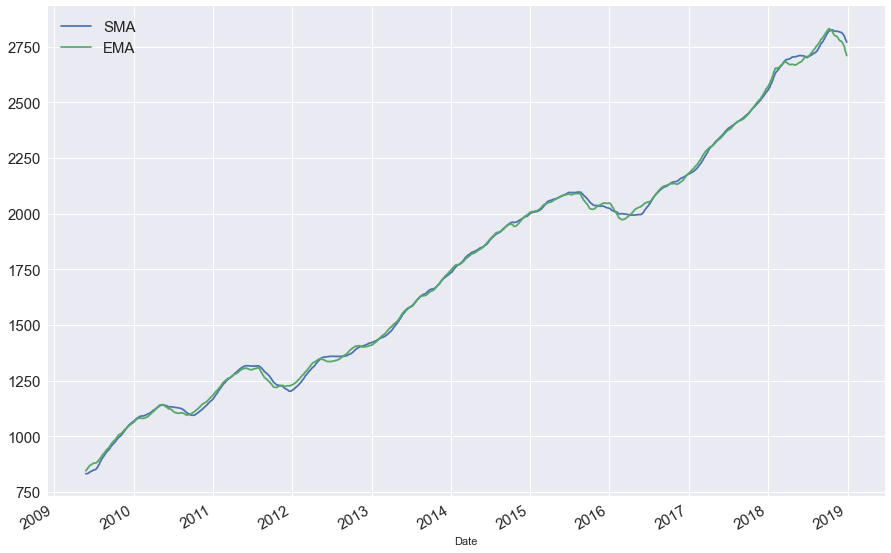

In [93]:
SP500.iloc[:, -2:].plot(figsize=(15,10), fontsize=15)
plt.legend(fontsize=15)
plt.show()

#142 금융 시계열 정렬 및 병합하기(실습)

In [94]:
import pandas as pd

In [96]:
stocks = pd.read_csv("../data/stocks.csv", header=[0,1], index_col=[0], parse_dates=[0]).Close

In [97]:
stocks.head()

Symbols,MSFT,GE,AAPL
Date,,,
2010-01-04,30.950001,14.855769,7.643214
2010-01-05,30.959999,14.932692,7.656429
2010-01-06,30.770000,14.855769,7.534643
2010-01-07,30.450001,15.625000,7.520714
2010-01-08,30.660000,15.961538,7.570714


In [98]:
type(stocks.loc["2010-01-01":"2014-12-31", "AAPL"])

pandas.core.series.Series

In [99]:
aapl = stocks.loc["2010-01-01":"2014-12-31", "AAPL"].to_frame()
aapl.head()

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [100]:
ge = stocks.loc["2012-01-01":"2016-12-31", "GE"].to_frame()
ge.head()

,GE
Date,
2012-01-03,17.653847
2012-01-04,17.846153
2012-01-05,17.836538
2012-01-06,17.932692
2012-01-09,18.134615


In [101]:
aapl["GE"] = ge.GE

In [102]:
aapl.head()

,AAPL,GE
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,NaN
2010-01-06,7.534643,NaN
2010-01-07,7.520714,NaN
2010-01-08,7.570714,NaN


In [103]:
aapl.tail()

,AAPL,GE
Date,,
2014-12-24,28.002501,24.836538
2014-12-26,28.497499,24.788462
2014-12-29,28.477501,24.711538
2014-12-30,28.129999,24.586538
2014-12-31,27.594999,24.298077


In [104]:
aapl.dropna()

,AAPL,GE
Date,,
2012-01-03,14.686786,17.653847
2012-01-04,14.765714,17.846153
2012-01-05,14.929643,17.836538
2012-01-06,15.085714,17.932692
2012-01-09,15.061786,18.134615
...,...,...
2014-12-24,28.002501,24.836538
2014-12-26,28.497499,24.788462
2014-12-29,28.477501,24.711538


In [105]:
ge.reindex(aapl.index).dropna()

,GE
Date,
2012-01-03,17.653847
2012-01-04,17.846153
2012-01-05,17.836538
2012-01-06,17.932692
2012-01-09,18.134615
...,...
2014-12-24,24.836538
2014-12-26,24.788462
2014-12-29,24.711538


In [106]:
# 날짜가 적은 시계열에 맞추는게 일반적 
msft = stocks.loc["2010-01-01":"2016-12-31", "MSFT"].resample("W-Fri").last().to_frame()
msft.head()

,MSFT
Date,
2010-01-08,30.660000
2010-01-15,30.860001
2010-01-22,28.959999
2010-01-29,28.180000
2010-02-05,28.020000


In [107]:
aapl["MSFT"] = msft.MSFT

In [108]:
aapl.head(10)

,AAPL,GE,MSFT
Date,,,
2010-01-04,7.643214,NaN,NaN
2010-01-05,7.656429,NaN,NaN
2010-01-06,7.534643,NaN,NaN
2010-01-07,7.520714,NaN,NaN
2010-01-08,7.570714,NaN,30.660000
2010-01-11,7.503929,NaN,NaN
2010-01-12,7.418571,NaN,NaN
2010-01-13,7.523214,NaN,NaN
2010-01-14,7.479643,NaN,NaN


In [109]:
msft["AAPL"] = aapl.AAPL

In [110]:
msft.head(10)

,MSFT,AAPL
Date,,
2010-01-08,30.660000,7.570714
2010-01-15,30.860001,7.354643
2010-01-22,28.959999,7.062500
2010-01-29,28.180000,6.859286
2010-02-05,28.020000,6.980714
2010-02-12,27.930000,7.156429
2010-02-19,28.770000,7.202500
2010-02-26,28.670000,7.307857
2010-03-05,28.590000,7.819643


#143 유용한 DatetimeIndex 속성 및 메서드

In [111]:
close = stocks.copy()

In [112]:
close.head()

Symbols,MSFT,GE,AAPL
Date,,,
2010-01-04,30.950001,14.855769,7.643214
2010-01-05,30.959999,14.932692,7.656429
2010-01-06,30.770000,14.855769,7.534643
2010-01-07,30.450001,15.625000,7.520714
2010-01-08,30.660000,15.961538,7.570714


In [113]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2769 entries, 2010-01-04 to 2020-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2769 non-null   float64
 1   GE      2769 non-null   float64
 2   AAPL    2769 non-null   float64
dtypes: float64(3)
memory usage: 151.1 KB


In [114]:
close.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2769, freq=None)

In [115]:
close.index.day

Int64Index([ 4,  5,  6,  7,  8, 11, 12, 13, 14, 15,
            ...
            17, 18, 21, 22, 23, 24, 28, 29, 30, 31],
           dtype='int64', name='Date', length=2769)

In [116]:
close.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=2769)

In [117]:
close.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=2769)

In [118]:
close.index.day_name()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='Date', length=2769)

In [120]:
# close.index.weekday_name # not working

In [121]:
close.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='Date', length=2769)

In [122]:
close.index.weekday

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            3, 4, 0, 1, 2, 3, 0, 1, 2, 3],
           dtype='int64', name='Date', length=2769)

In [123]:
close. index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='Date', length=2769)

In [124]:
close.index.days_in_month

Int64Index([31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
            ...
            31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
           dtype='int64', name='Date', length=2769)

In [125]:
close.index.isocalendar().week

Date
2010-01-04     1
2010-01-05     1
2010-01-06     1
2010-01-07     1
2010-01-08     1
              ..
2020-12-24    52
2020-12-28    53
2020-12-29    53
2020-12-30    53
2020-12-31    53
Name: week, Length: 2769, dtype: UInt32

In [126]:
close.index.weekofyear

C:\Users\dukim\AppData\Local\Temp\ipykernel_7136\3635336598.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  close.index.weekofyear


Int64Index([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
            ...
            51, 51, 52, 52, 52, 52, 53, 53, 53, 53],
           dtype='int64', name='Date', length=2769)

In [127]:
close.index.is_month_end

array([False, False, False, ..., False, False,  True])

In [128]:
close["Day"] = stocks.index.day_name()
close["Quarter"] = stocks.index.quarter

In [129]:
close.head()

Symbols,MSFT,GE,AAPL,Day,Quarter
Date,,,,,
2010-01-04,30.950001,14.855769,7.643214,Monday,1
2010-01-05,30.959999,14.932692,7.656429,Tuesday,1
2010-01-06,30.770000,14.855769,7.534643,Wednesday,1
2010-01-07,30.450001,15.625000,7.520714,Thursday,1
2010-01-08,30.660000,15.961538,7.570714,Friday,1


#144 bfill, fill 및 보간법으로 NA값 채우기

In [130]:
close.head()

Symbols,MSFT,GE,AAPL,Day,Quarter
Date,,,,,
2010-01-04,30.950001,14.855769,7.643214,Monday,1
2010-01-05,30.959999,14.932692,7.656429,Tuesday,1
2010-01-06,30.770000,14.855769,7.534643,Wednesday,1
2010-01-07,30.450001,15.625000,7.520714,Thursday,1
2010-01-08,30.660000,15.961538,7.570714,Friday,1


In [131]:
close.tail()

Symbols,MSFT,GE,AAPL,Day,Quarter
Date,,,,,
2020-12-24,222.750000,10.65,131.970001,Thursday,4
2020-12-28,224.960007,10.64,136.690002,Monday,4
2020-12-29,224.149994,10.56,134.869995,Tuesday,4
2020-12-30,221.679993,10.71,133.720001,Wednesday,4
2020-12-31,222.419998,10.80,132.690002,Thursday,4


In [132]:
all_days = pd.date_range(start="2009-12-31", end="2019-02-06", freq="D")
all_days

DatetimeIndex(['2009-12-31', '2010-01-01', '2010-01-02', '2010-01-03',
               '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-09',
               ...
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', length=3325, freq='D')

In [133]:
close = close.reindex(all_days)

In [134]:
close.head(20)

Symbols,MSFT,GE,AAPL,Day,Quarter
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN,NaN
2010-01-02,NaN,NaN,NaN,NaN,NaN
2010-01-03,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.950001,14.855769,7.643214,Monday,1.0
2010-01-05,30.959999,14.932692,7.656429,Tuesday,1.0
2010-01-06,30.770000,14.855769,7.534643,Wednesday,1.0
2010-01-07,30.450001,15.625000,7.520714,Thursday,1.0
2010-01-08,30.660000,15.961538,7.570714,Friday,1.0
2010-01-09,NaN,NaN,NaN,NaN,NaN


In [135]:
close.Day = close.index.day_name()
close.Quarter = close.index.quarter

In [136]:
close.head()

Symbols,MSFT,GE,AAPL,Day,Quarter
2009-12-31,NaN,NaN,NaN,Thursday,4
2010-01-01,NaN,NaN,NaN,Friday,1
2010-01-02,NaN,NaN,NaN,Saturday,1
2010-01-03,NaN,NaN,NaN,Sunday,1
2010-01-04,30.950001,14.855769,7.643214,Monday,1


In [137]:
close.fillna(method = "bfill")

Symbols,MSFT,GE,AAPL,Day,Quarter
2009-12-31,30.950001,14.855769,7.643214,Thursday,4
2010-01-01,30.950001,14.855769,7.643214,Friday,1
2010-01-02,30.950001,14.855769,7.643214,Saturday,1
2010-01-03,30.950001,14.855769,7.643214,Sunday,1
2010-01-04,30.950001,14.855769,7.643214,Monday,1
...,...,...,...,...,...
2019-02-02,105.739998,9.817308,42.812500,Saturday,1
2019-02-03,105.739998,9.817308,42.812500,Sunday,1
2019-02-04,105.739998,9.817308,42.812500,Monday,1
2019-02-05,107.220001,10.221154,43.544998,Tuesday,1


In [138]:
close.head(15)

Symbols,MSFT,GE,AAPL,Day,Quarter
2009-12-31,NaN,NaN,NaN,Thursday,4
2010-01-01,NaN,NaN,NaN,Friday,1
2010-01-02,NaN,NaN,NaN,Saturday,1
2010-01-03,NaN,NaN,NaN,Sunday,1
2010-01-04,30.950001,14.855769,7.643214,Monday,1
2010-01-05,30.959999,14.932692,7.656429,Tuesday,1
2010-01-06,30.770000,14.855769,7.534643,Wednesday,1
2010-01-07,30.450001,15.625000,7.520714,Thursday,1
2010-01-08,30.660000,15.961538,7.570714,Friday,1
2010-01-09,NaN,NaN,NaN,Saturday,1


#145 시간대 변환하기(파트1)

In [139]:
import pandas as pd

In [140]:
ge = pd.read_csv("../data/GE_prices.csv", index_col="date", parse_dates=["date"])

In [141]:
ge.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-07-29 10:00:00,10.5000,10.5800,10.4300,10.4400,4840329.0
2019-07-29 10:30:00,10.4404,10.4847,10.3997,10.4104,3860280.0
2019-07-29 11:00:00,10.4200,10.5000,10.4100,10.5000,1912153.0
2019-07-29 11:30:00,10.4931,10.5300,10.4800,10.4850,1916453.0
2019-07-29 12:00:00,10.4900,10.5000,10.4400,10.4500,2467638.0


In [142]:
ge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2019-07-29 10:00:00 to 2019-09-09 16:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    389 non-null    float64
 1   2. high    389 non-null    float64
 2   3. low     389 non-null    float64
 3   4. close   389 non-null    float64
 4   5. volume  389 non-null    float64
dtypes: float64(5)
memory usage: 18.2 KB


In [143]:
ge.index

DatetimeIndex(['2019-07-29 10:00:00', '2019-07-29 10:30:00',
               '2019-07-29 11:00:00', '2019-07-29 11:30:00',
               '2019-07-29 12:00:00', '2019-07-29 12:30:00',
               '2019-07-29 13:00:00', '2019-07-29 13:30:00',
               '2019-07-29 14:00:00', '2019-07-29 14:30:00',
               ...
               '2019-09-09 11:30:00', '2019-09-09 12:00:00',
               '2019-09-09 12:30:00', '2019-09-09 13:00:00',
               '2019-09-09 13:30:00', '2019-09-09 14:00:00',
               '2019-09-09 14:30:00', '2019-09-09 15:00:00',
               '2019-09-09 15:30:00', '2019-09-09 16:00:00'],
              dtype='datetime64[ns]', name='date', length=389, freq=None)

In [144]:
print(ge.index.tz)

None


In [145]:
ge.tz_localize("UTC")

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-07-29 10:00:00+00:00,10.5000,10.5800,10.4300,10.4400,4840329.0
2019-07-29 10:30:00+00:00,10.4404,10.4847,10.3997,10.4104,3860280.0
2019-07-29 11:00:00+00:00,10.4200,10.5000,10.4100,10.5000,1912153.0
2019-07-29 11:30:00+00:00,10.4931,10.5300,10.4800,10.4850,1916453.0
2019-07-29 12:00:00+00:00,10.4900,10.5000,10.4400,10.4500,2467638.0
...,...,...,...,...,...
2019-09-09 14:00:00+00:00,8.9900,8.9950,8.9700,8.9800,1740722.0
2019-09-09 14:30:00+00:00,8.9735,9.0000,8.9700,8.9835,1412823.0
2019-09-09 15:00:00+00:00,8.9900,9.0100,8.9350,8.9500,4177838.0


In [146]:
ge.tz_localize("America/New_York")

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-07-29 10:00:00-04:00,10.5000,10.5800,10.4300,10.4400,4840329.0
2019-07-29 10:30:00-04:00,10.4404,10.4847,10.3997,10.4104,3860280.0
2019-07-29 11:00:00-04:00,10.4200,10.5000,10.4100,10.5000,1912153.0
2019-07-29 11:30:00-04:00,10.4931,10.5300,10.4800,10.4850,1916453.0
2019-07-29 12:00:00-04:00,10.4900,10.5000,10.4400,10.4500,2467638.0
...,...,...,...,...,...
2019-09-09 14:00:00-04:00,8.9900,8.9950,8.9700,8.9800,1740722.0
2019-09-09 14:30:00-04:00,8.9735,9.0000,8.9700,8.9835,1412823.0
2019-09-09 15:00:00-04:00,8.9900,9.0100,8.9350,8.9500,4177838.0


In [147]:
ge = ge.tz_localize("America/New_York")

In [148]:
ge.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-07-29 10:00:00-04:00,10.5000,10.5800,10.4300,10.4400,4840329.0
2019-07-29 10:30:00-04:00,10.4404,10.4847,10.3997,10.4104,3860280.0
2019-07-29 11:00:00-04:00,10.4200,10.5000,10.4100,10.5000,1912153.0
2019-07-29 11:30:00-04:00,10.4931,10.5300,10.4800,10.4850,1916453.0
2019-07-29 12:00:00-04:00,10.4900,10.5000,10.4400,10.4500,2467638.0


#146 시간대 변환하기(파트2)

In [149]:
ge.index.tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [150]:
ge.tz_convert("UTC")

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-07-29 14:00:00+00:00,10.5000,10.5800,10.4300,10.4400,4840329.0
2019-07-29 14:30:00+00:00,10.4404,10.4847,10.3997,10.4104,3860280.0
2019-07-29 15:00:00+00:00,10.4200,10.5000,10.4100,10.5000,1912153.0
2019-07-29 15:30:00+00:00,10.4931,10.5300,10.4800,10.4850,1916453.0
2019-07-29 16:00:00+00:00,10.4900,10.5000,10.4400,10.4500,2467638.0
...,...,...,...,...,...
2019-09-09 18:00:00+00:00,8.9900,8.9950,8.9700,8.9800,1740722.0
2019-09-09 18:30:00+00:00,8.9735,9.0000,8.9700,8.9835,1412823.0
2019-09-09 19:00:00+00:00,8.9900,9.0100,8.9350,8.9500,4177838.0


In [151]:
ge.tz_convert("America/Los_Angeles")

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-07-29 07:00:00-07:00,10.5000,10.5800,10.4300,10.4400,4840329.0
2019-07-29 07:30:00-07:00,10.4404,10.4847,10.3997,10.4104,3860280.0
2019-07-29 08:00:00-07:00,10.4200,10.5000,10.4100,10.5000,1912153.0
2019-07-29 08:30:00-07:00,10.4931,10.5300,10.4800,10.4850,1916453.0
2019-07-29 09:00:00-07:00,10.4900,10.5000,10.4400,10.4500,2467638.0
...,...,...,...,...,...
2019-09-09 11:00:00-07:00,8.9900,8.9950,8.9700,8.9800,1740722.0
2019-09-09 11:30:00-07:00,8.9735,9.0000,8.9700,8.9835,1412823.0
2019-09-09 12:00:00-07:00,8.9900,9.0100,8.9350,8.9500,4177838.0


In [152]:
ge_la = ge.tz_convert("America/Los_Angeles")

In [153]:
ge.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-07-29 10:00:00-04:00,10.5000,10.5800,10.4300,10.4400,4840329.0
2019-07-29 10:30:00-04:00,10.4404,10.4847,10.3997,10.4104,3860280.0
2019-07-29 11:00:00-04:00,10.4200,10.5000,10.4100,10.5000,1912153.0
2019-07-29 11:30:00-04:00,10.4931,10.5300,10.4800,10.4850,1916453.0
2019-07-29 12:00:00-04:00,10.4900,10.5000,10.4400,10.4500,2467638.0


In [154]:
comb = pd.concat([ge, ge_la], axis=1)

In [155]:
comb.head()

,1. open,2. high,3. low,4. close,5. volume,1. open,2. high,3. low,4. close,5. volume
date,,,,,,,,,,
2019-07-29 14:00:00+00:00,10.5000,10.5800,10.4300,10.4400,4840329.0,10.5000,10.5800,10.4300,10.4400,4840329.0
2019-07-29 14:30:00+00:00,10.4404,10.4847,10.3997,10.4104,3860280.0,10.4404,10.4847,10.3997,10.4104,3860280.0
2019-07-29 15:00:00+00:00,10.4200,10.5000,10.4100,10.5000,1912153.0,10.4200,10.5000,10.4100,10.5000,1912153.0
2019-07-29 15:30:00+00:00,10.4931,10.5300,10.4800,10.4850,1916453.0,10.4931,10.5300,10.4800,10.4850,1916453.0
2019-07-29 16:00:00+00:00,10.4900,10.5000,10.4400,10.4500,2467638.0,10.4900,10.5000,10.4400,10.4500,2467638.0


In [156]:
import pytz

In [157]:
len(pytz.all_timezones)

594

In [158]:
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer